In [24]:
# imports in one place, research if it can lead to errors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# import and print data from csv file
data = pd.read_csv("remo.csv")
print(data)

                country  femaleemployrate  employrate
0           Afghanistan         25.600000   55.700001
1               Albania         42.099998   51.400002
2               Algeria         31.700001   50.500000
3                Angola         69.400002   75.699997
4             Argentina         45.900002   58.400002
..                  ...               ...         ...
173             Vietnam         67.599998   71.000000
174  West Bank and Gaza         11.300000   32.000000
175         Yemen, Rep.         20.299999   39.000000
176              Zambia         53.500000   61.000000
177            Zimbabwe         58.099998   66.800003

[178 rows x 3 columns]


In [3]:
# variable names for easier analysis
fem = data["femaleemployrate"]
emp = data["employrate"]

# max employment to check because in other column with missing data max gave a wrong value
emp.max()

83.19999695

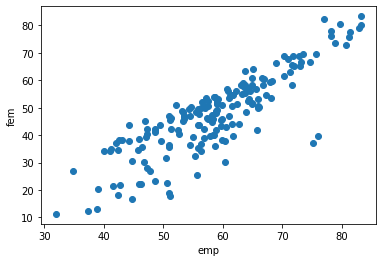

In [4]:
# x-axis and y-axis labels
plt.xlabel("emp")
plt.ylabel("fem")

# plot a scatter graph
plt.scatter(emp, fem)

In [5]:
# One or more labelled 'data points of interest' 
    # India, Pakistan, Bangladesh, UAE, Sri Lanka, S Korea, China, Japan
# An explanation of the following:
# why you chose to plot those particular columns in the data
    # because I had a sense they would correlate but just to be sure
# how you sorted or filtered the data
    # sort by country name 
    # filtered by highest female employment rates and lowest employment rates
# what makes the labelled points interesting.
    # 

In [6]:
#sort by country name
data.sort_values("country") 

,country,femaleemployrate,employrate
0,Afghanistan,25.600000,55.700001
1,Albania,42.099998,51.400002
2,Algeria,31.700001,50.500000
3,Angola,69.400002,75.699997
4,Argentina,45.900002,58.400002
...,...,...,...
173,Vietnam,67.599998,71.000000
174,West Bank and Gaza,11.300000,32.000000
175,"Yemen, Rep.",20.299999,39.000000
176,Zambia,53.500000,61.000000


In [7]:
#lowest and highest female employment rates
data.sort_values("femaleemployrate") 

,country,femaleemployrate,employrate
174,West Bank and Gaza,11.300000,32.000000
75,Iraq,12.400000,37.400002
81,Jordan,13.000000,38.900002
154,Syria,16.700001,44.799999
137,Saudi Arabia,17.700001,51.200001
...,...,...,...
98,Madagascar,79.199997,83.000000
165,Uganda,80.000000,83.199997
136,Rwanda,80.500000,79.800003
111,Mozambique,82.199997,77.000000


In [8]:
#lowest and highest employment rates
data.sort_values("employrate") 

,country,femaleemployrate,employrate
174,West Bank and Gaza,11.300000,32.000000
97,"Macedonia, FYR",26.799999,34.900002
75,Iraq,12.400000,37.400002
81,Jordan,13.000000,38.900002
175,"Yemen, Rep.",20.299999,39.000000
...,...,...,...
24,Burkina Faso,75.800003,81.300003
64,Guinea,77.599998,81.500000
98,Madagascar,79.199997,83.000000
165,Uganda,80.000000,83.199997


In [9]:
# filter
# equality? as shown by female employment rates?

most_equal = data[data["femaleemployrate"] > 75]

#sorted by employment rate, descending! I found how to sort by descending myself! from here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
most_equal_sorted = most_equal.sort_values("femaleemployrate", ascending=False) 

#highest 5, comment out brackets for all in range.
most_equal_sorted[0:5] 

,country,femaleemployrate,employrate
25,Burundi,83.300003,83.199997
111,Mozambique,82.199997,77.000000
136,Rwanda,80.500000,79.800003
165,Uganda,80.000000,83.199997
98,Madagascar,79.199997,83.000000


In [10]:
# filter
# need economic development as shown by low employment rate

least_well_off = data[data["employrate"] < 45]

#sorted by employment rate
least_well_off_sorted =least_well_off.sort_values("employrate") 

#lowest 5, comment out brackets for all in range.
least_well_off_sorted[0:5]


,country,femaleemployrate,employrate
174,West Bank and Gaza,11.300000,32.000000
97,"Macedonia, FYR",26.799999,34.900002
75,Iraq,12.400000,37.400002
81,Jordan,13.000000,38.900002
175,"Yemen, Rep.",20.299999,39.000000


In [11]:
# country with highest female employment rate
most_equal_sorted.iloc[0]

country             Burundi
femaleemployrate       83.3
employrate             83.2
Name: 25, dtype: object

In [12]:
# country with lowest employment rate
least_well_off_sorted.iloc[0]

country             West Bank and Gaza
femaleemployrate                  11.3
employrate                          32
Name: 174, dtype: object

In [13]:
# MEANS!

all_employ = np.mean(data["employrate"]) 
all_fem = np.mean(data["femaleemployrate"])

print(all_employ, all_fem)

58.63595508224719 47.549438063876394


Text(32.0, 11.30000019, 'West Bank and Gaza')

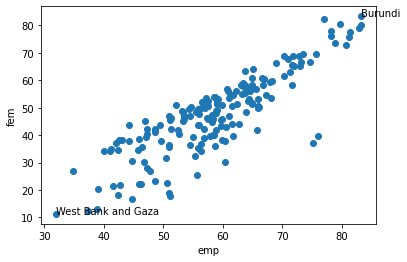

In [14]:
# x-axis and y-axis labels
plt.xlabel("emp")
plt.ylabel("fem")

# plot a scatter graph
plt.scatter(emp, fem)

# where on the graph is the most equal country
plt.text(most_equal_sorted.iloc[0]["employrate"], 
         most_equal_sorted.iloc[0]["femaleemployrate"],
         most_equal_sorted.iloc[0]["country"])

# where on the graph is the least well-off country
plt.text(least_well_off_sorted.iloc[0]["employrate"], 
         least_well_off_sorted.iloc[0]["femaleemployrate"],
         least_well_off_sorted.iloc[0]["country"])

# both countires were categorized according to different vairables and rules, so do not compare them. 
# Burundi is categorized as highest *female* employment rate and West Bank and Gaza as lowest *general* employment rate.

In [15]:
# just names of countries where employment rate is less than 45%
for k,row in least_well_off_sorted.iterrows():
    print(row["country"])

West Bank and Gaza
Macedonia, FYR
Iraq
Jordan
Yemen, Rep.
Armenia
South Africa
Bosnia and Herzegovina
Tunisia
Namibia
Egypt
Puerto Rico
Martinique
Turkey
Guadeloupe
Reunion
Moldova
Suriname
Syria


In [16]:
# just names of countries where female employment rate is higher than 75%
for k,row in most_equal_sorted.iterrows():
    print(row["country"])

Burundi
Mozambique
Rwanda
Uganda
Madagascar
Laos
Guinea
Tanzania
Burkina Faso


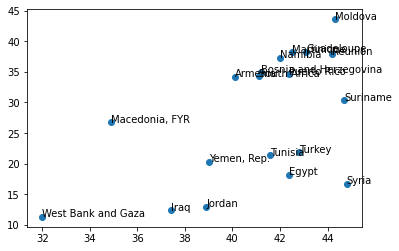

In [17]:
# country labels, countries with lowest employment rates

plt.scatter(least_well_off["employrate"], least_well_off["femaleemployrate"])

for k,row in least_well_off.iterrows():
    plt.text(row["employrate"],
            row["femaleemployrate"],
            row["country"])
    


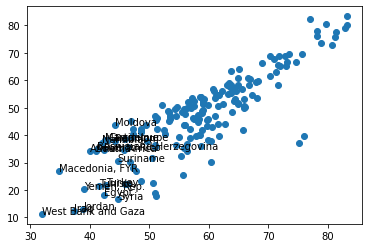

In [37]:
# Above countries in comparison to worldwide

plt.scatter(emp, fem)

for k,row in least_well_off.iterrows():
    plt.text(row["employrate"],
            row["femaleemployrate"],
            row["country"])

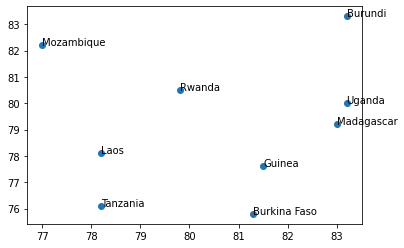

In [40]:
# country labels, countries with highest female employment rates

plt.scatter(most_equal["employrate"], most_equal["femaleemployrate"])

for k,row in most_equal.iterrows():
    plt.text(row["employrate"],
            row["femaleemployrate"],
            row["country"])
    

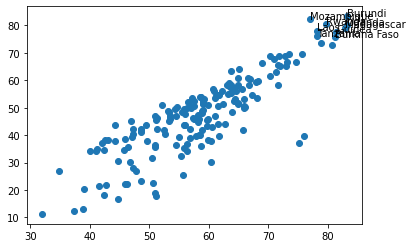

In [39]:
# Above countries in comparison to worldwide

plt.scatter(emp, fem)

for k,row in most_equal.iterrows():
    plt.text(row["employrate"],
            row["femaleemployrate"],
            row["country"])
    

In [27]:
# import KMeans from sklearn
from sklearn.cluster import KMeans

# covert 2 1D lists into a 2D one which will be used for KMeans
emp_fem = np.column_stack ((emp, fem))
print(emp_fem)

[[55.70000076 25.60000038]
 [51.40000153 42.09999847]
 [50.5        31.70000076]
 [75.69999695 69.40000153]
 [58.40000153 45.90000153]
 [40.09999847 34.20000076]
 [61.5        54.59999847]
 [57.09999847 49.70000076]
 [60.90000153 56.20000076]
 [66.59999847 60.70000076]
 [60.40000153 30.20000076]
 [68.09999847 53.59999847]
 [66.90000153 60.29999924]
 [53.40000153 48.59999847]
 [48.59999847 41.70000076]
 [56.79999924 38.79999924]
 [71.59999847 58.20000076]
 [58.40000153 39.90000153]
 [70.40000153 61.59999847]
 [41.20000076 34.90000153]
 [46.         38.70000076]
 [64.5        53.29999924]
 [63.79999924 55.5       ]
 [47.29999924 42.09999847]
 [81.30000305 75.80000305]
 [83.19999695 83.30000305]
 [78.90000153 73.40000153]
 [59.09999847 49.        ]
 [63.5        58.90000153]
 [55.90000153 43.59999847]
 [71.30000305 62.90000153]
 [68.90000153 66.30000305]
 [51.         35.5       ]
 [72.80000305 68.90000153]
 [63.20000076 54.90000153]
 [68.         59.29999924]
 [66.19999695 50.40000153]
 

In [33]:
#KMeans formula!!!

km_res = KMeans(n_clusters=10).fit(emp_fem) # how many clusters and which 2D array

km_res.cluster_centers_ #what are the cluster coordinates?

array([[39.31111145, 17.99999989],
       [64.65000004, 55.84166675],
       [49.49411774, 42.69999942],
       [80.45454476, 78.10909063],
       [57.08000002, 48.96249971],
       [65.2222218 , 42.38888846],
       [56.80555619, 37.26666641],
       [71.71333313, 66.49333343],
       [43.28333346, 35.75000016],
       [49.25454538, 24.47272751]])

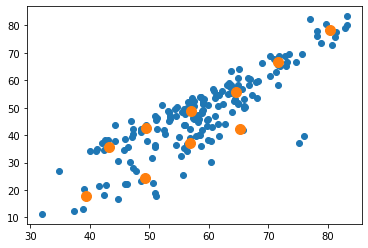

In [36]:
clusters = km_res.cluster_centers_

plt.scatter(emp, fem)
plt.scatter(clusters[:,0], clusters[:,1], s=100)

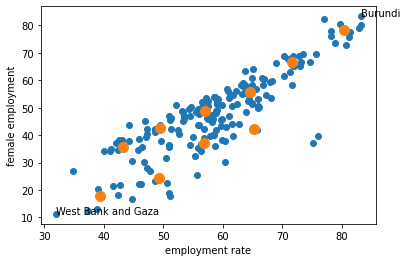

In [46]:
clusters = km_res.cluster_centers_ #clusters label.

# x-axis and y-axis labels
plt.xlabel("employment rate")
plt.ylabel("female employment")

# plot a scatter graph
plt.scatter(emp, fem)

# where on the graph is the most equal country
plt.text(most_equal_sorted.iloc[0]["employrate"], 
         most_equal_sorted.iloc[0]["femaleemployrate"],
         most_equal_sorted.iloc[0]["country"])

# where on the graph is the least well-off country
plt.text(least_well_off_sorted.iloc[0]["employrate"], 
         least_well_off_sorted.iloc[0]["femaleemployrate"],
         least_well_off_sorted.iloc[0]["country"])

# both countires were categorized according to different vairables and rules, so do not compare them. 
# Burundi is categorized as highest *female* employment rate and West Bank and Gaza as lowest *general* employment rate.
    
plt.scatter(clusters[:,0], clusters[:,1], s=100)